<font size=4>题目1：设想你是某门课程的教师，想通过学生平时和期末两次的评定成绩，来决定他们是否通过这门课程。现在你拥有之前学生的可以用于训练的样本集[data-1.txt](https://oc.sjtu.edu.cn/courses/66441/files/8598130?wrap=1) 。对于每一个训练样本，你有他们平时和期末评分及最后是通过课程的结果（1为通过，0为不通过）。请利用逻辑回归或支撑向量机方法建立分类器。</font>

In [19]:
import requests
import http.cookiejar as cookielib
import urllib3
import pandas as pd
import os

# close undesirable warnings
urllib3.disable_warnings()

def request_data():
    userAgent  = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"
    cookies = "_ga=GA1.3.612926324.1703474509; oc.sjtu.edu.cn=22632.57540.21071.0000; _gid=GA1.3.251492791.1709964939; _ga_QP6YR9D8CK=GS1.3.1709964940.3.0.1709964940.0.0.0; log_session_id=071b4507d9329edaf60cb29f80ec15cd; _legacy_normandy_session=f7BdnpGPmrgs5CJu3mCMOw+BFxPhjutwGI__T5nywh6EdUgrl8Cvfi3BFpbgbtHHtPCJNk7DPybRXwWqb2BtL5DsF6yvTZNFfU1EYSZU0Xj_OSQPWdO5hJIKUoz-M1dYIzqu4mNA85pcTG93eiVyMbxyTBM0YWrzw8jACvK-JRC1h2woQHksGlbHsJotRXygVdM6olkR4EBTmE5RH7pPGFV84MAMHZHQZpETJwwh1srvNC8fozkhyWQdbHu9gGaYPXN5s-V8YVHb8L-R7KZPbGTlkDMKICKj81V8GvCP0LxaZlmzA3NY_o1RbMCyT-tOZt-JK1nowwRqOhPH6BVLSinQuDoLYzrz21h6cGY5uGhUOKjulBJPxwoT6Jd44soH7KlZ9lxYTMVhPpuSKv_hk6SH6fCoXau8cCPwK6rGCIOgj8symgaGiP_QowwmA-yxRbyhIz3TxwAKp_MPWsLJNQfqFIpyfwji9pPUhuZvoUHS9-z-i_TSyeFelZSJV0xJeAdqM6Tg6LeOpIGZa9uHp7kJ6T-XQh4X7VaX_03zlrsSlGWYRJ_PHtDGiFcQe91UqFYtMlyJHSvYlYnaKwlruGL.vf5tibadhVXakYfERkrgpotadD0.ZewMrA; _normandy_session=f7BdnpGPmrgs5CJu3mCMOw+BFxPhjutwGI__T5nywh6EdUgrl8Cvfi3BFpbgbtHHtPCJNk7DPybRXwWqb2BtL5DsF6yvTZNFfU1EYSZU0Xj_OSQPWdO5hJIKUoz-M1dYIzqu4mNA85pcTG93eiVyMbxyTBM0YWrzw8jACvK-JRC1h2woQHksGlbHsJotRXygVdM6olkR4EBTmE5RH7pPGFV84MAMHZHQZpETJwwh1srvNC8fozkhyWQdbHu9gGaYPXN5s-V8YVHb8L-R7KZPbGTlkDMKICKj81V8GvCP0LxaZlmzA3NY_o1RbMCyT-tOZt-JK1nowwRqOhPH6BVLSinQuDoLYzrz21h6cGY5uGhUOKjulBJPxwoT6Jd44soH7KlZ9lxYTMVhPpuSKv_hk6SH6fCoXau8cCPwK6rGCIOgj8symgaGiP_QowwmA-yxRbyhIz3TxwAKp_MPWsLJNQfqFIpyfwji9pPUhuZvoUHS9-z-i_TSyeFelZSJV0xJeAdqM6Tg6LeOpIGZa9uHp7kJ6T-XQh4X7VaX_03zlrsSlGWYRJ_PHtDGiFcQe91UqFYtMlyJHSvYlYnaKwlruGL.vf5tibadhVXakYfERkrgpotadD0.ZewMrA; _csrf_token=XFyB%2FJT7jweN64DOo7%2FkMogQrqgLh1Y6pjvhA4KD%2BQURPbXO26PMMeKf77aV%2BKgC3iLr0TnfOVPOco1TyOutcw%3D%3D"
    header = {
        "Referer": "https://oc.sjtu.edu.cn/courses/66441/files",
        'User-Agent': userAgent,
        "Cookie": cookies,
    }
    # session代表某一次连接
    s = requests.session()
    url = 'https://oc.sjtu.edu.cn/courses/66441/files/8598130/download?download_frd=1'
    response = s.get(url, headers = header)
    if response.status_code == 200:
        print("Gat data!")
        with open("./data1.csv", "wb") as f:
            f.write(response.content)
        return True
    else:
        print("Data not found!")
        return False

if not os.path.isfile("./data1.csv"):
    print("Data not prepared! Preparing data...")
    if not request_data():
        raise RuntimeError("Data not prepared!")
    print("OK!")

df = pd.read_csv("./data1.csv", header=None)
df.columns = ["x1", "x2", "y"]
df.describe(include='all')

,x1,x2,y
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


<font size=4>画出箱线图，观察是否有outliers。</font>

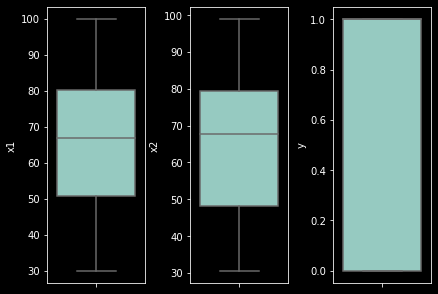

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=1)
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<font size=4>检查是否有多重共线性。</font>

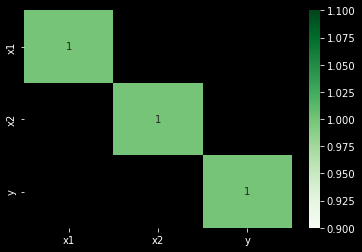

In [21]:
corrMatrix = df.corr()

# keep only high correlated items
highCorr = corrMatrix[corrMatrix >= .8]

# plot
sns.heatmap(highCorr, annot=True, cmap="Greens")
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Y = df['y']
X = df.drop(['y'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

logreg_model = LogisticRegression(max_iter=1000, tol=1e-6)
trained_model = logreg_model.fit(X_train, Y_train)